ASSIGNMENT- DECISION_TREE: 2

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other 
variables. Here are the steps you can follow:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
""" 1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes 
based on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer) """

' 1. Pregnancies: Number of times pregnant (integer)\n\n2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)\n\n3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)\n\n4. SkinThickness: Triceps skin fold thickness (mm) (integer)\n\n5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)\n\n6. BMI: Body mass index (weight in kg/(height in m)^2) (float)\n\n7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes \nbased on family history) (float)\n\n8. Age: Age in years (integer)\n\n9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer) '

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.shape

(768, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
corr=df.corr()

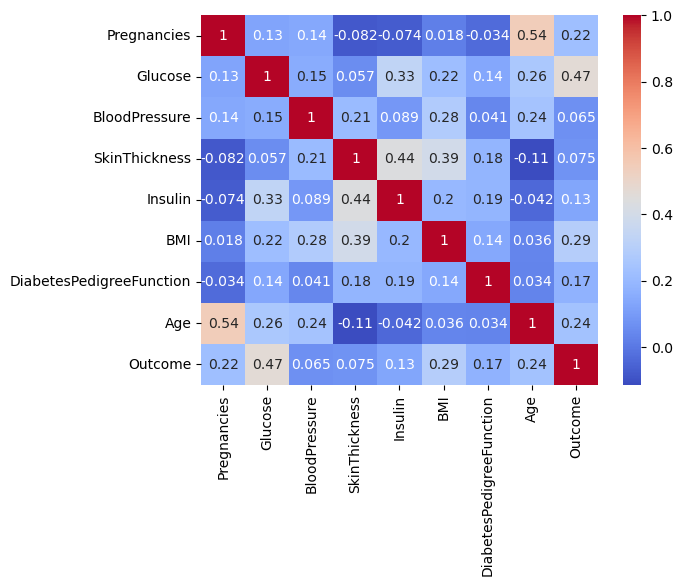

In [11]:
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()



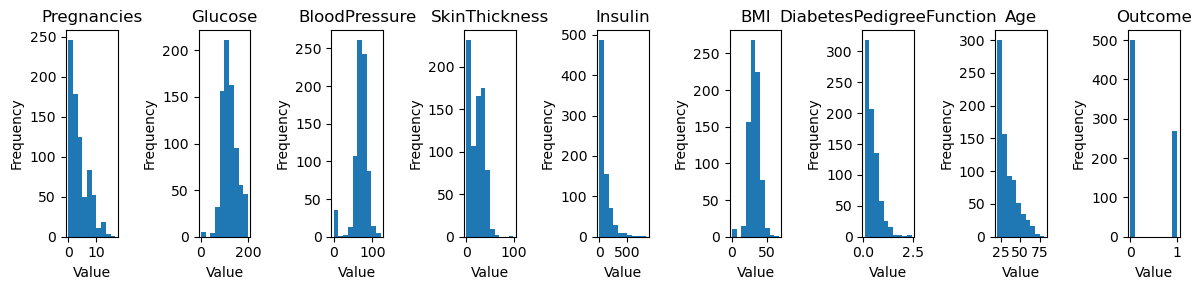

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(12, 3))

# plot histogram for each column
for i, col in enumerate(df.columns):
    axs[i].hist(df[col])
    axs[i].set_title(col)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

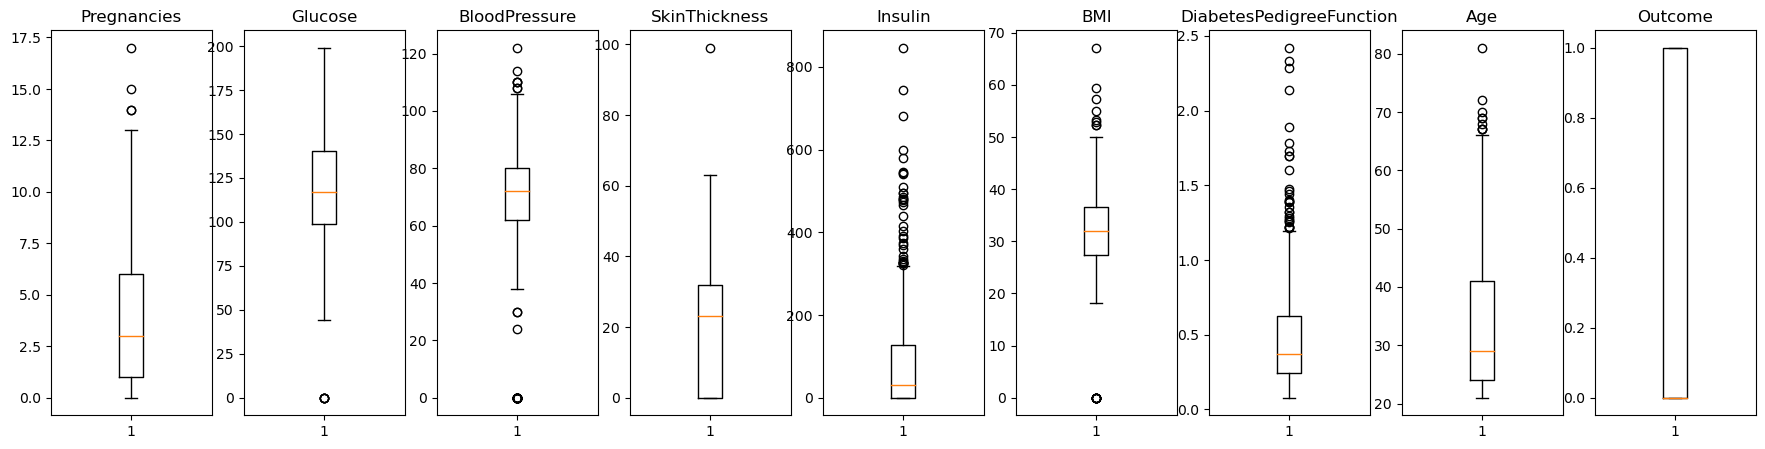

In [13]:
fig, axs = plt.subplots(ncols=df.shape[1], figsize=(22,5))
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)

plt.show()


In [14]:
# there are some outliers in the columns: pregnancies,glucose,bloodpressure,skinthickness,insulin,BMI,diabetespedigreefun,age

In [15]:
# removing outliers

In [16]:
# replacing it with median  value

In [17]:
for col in df.columns:
    median = df[col].median()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    df[col] = np.where((df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr), median, df[col])

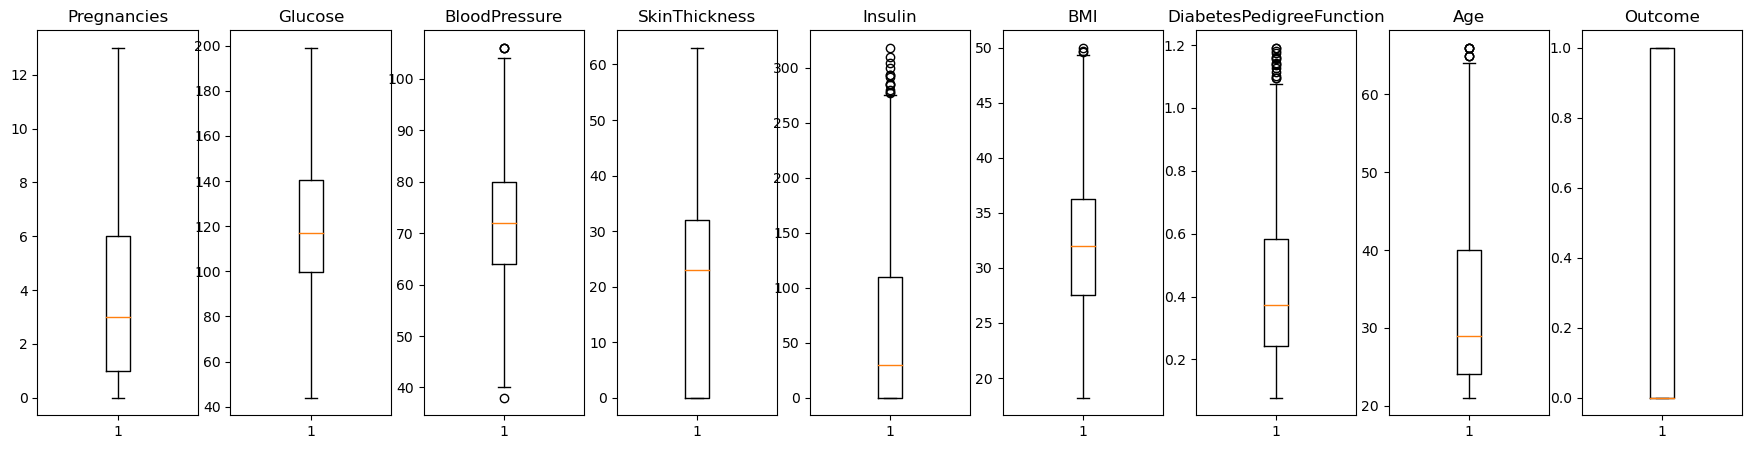

In [18]:
fig, axs = plt.subplots(ncols=df.shape[1], figsize=(22,5))
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)

plt.show()


<AxesSubplot: xlabel='Pregnancies', ylabel='Age'>

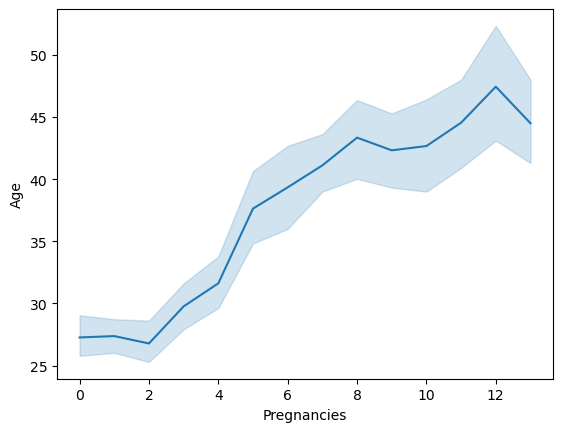

In [19]:
sns.lineplot(x='Pregnancies', y='Age', data=df)


In [20]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0


<AxesSubplot: xlabel='BloodPressure', ylabel='Age'>

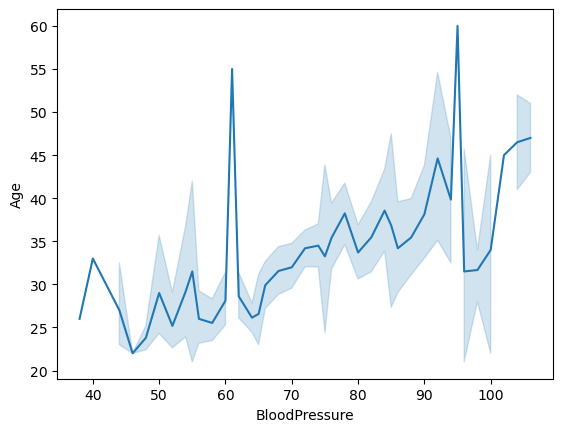

In [21]:
sns.lineplot(x='BloodPressure', y='Age', data=df)


<AxesSubplot: xlabel='BMI', ylabel='Age'>

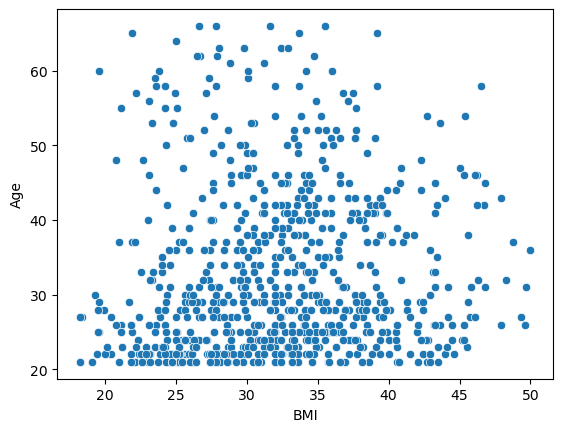

In [22]:
sns.scatterplot(x='BMI', y='Age', data=df)


<AxesSubplot: xlabel='SkinThickness', ylabel='BMI'>

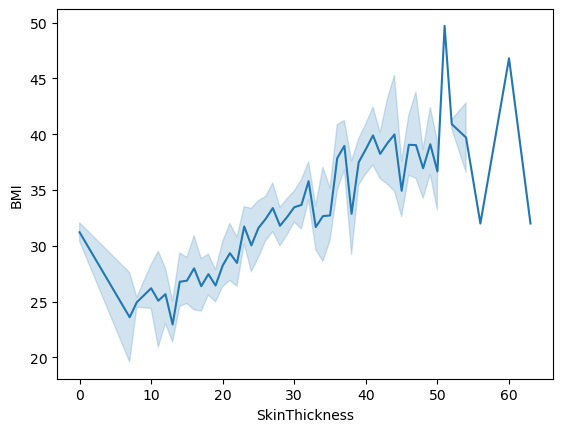

In [30]:
sns.lineplot(x='SkinThickness', y='BMI', data=df)


<AxesSubplot: xlabel='Age', ylabel='Glucose'>

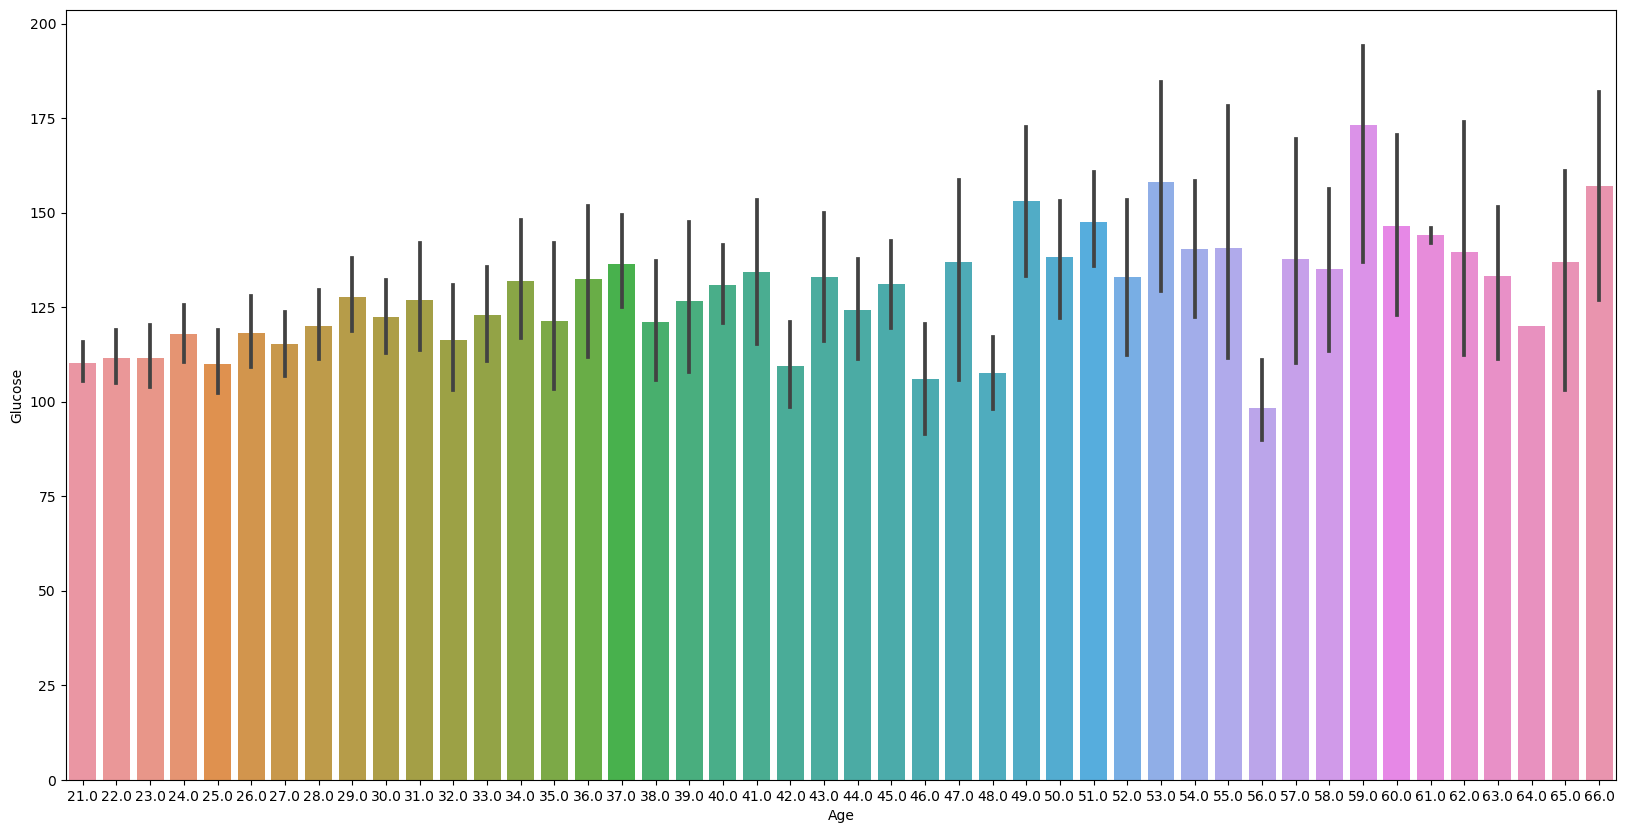

In [37]:
plt.figure(figsize=(20, 10))

sns.barplot(x='Age', y='Glucose', data=df)


In [39]:
X= df.iloc[:,:-1]

In [40]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.6270,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.3510,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.6720,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,0.3725,33.0


In [41]:
y= df.iloc[:,-1]

In [44]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [93]:
dt = DecisionTreeClassifier(random_state=42)

# define hyperparameter grid for grid search
param_grid = {'max_depth': [3,5,7, 10]}

# perform grid search with cross-validation to find optimal hyperparameters
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

# train the decision tree model with the optimal hyperparameters
dt = grid_search.best_estimator_
dt.fit(X_train, y_train)

# print the depth of the decision tree
print("Depth of the decision tree:", dt.get_depth())


Depth of the decision tree: 3


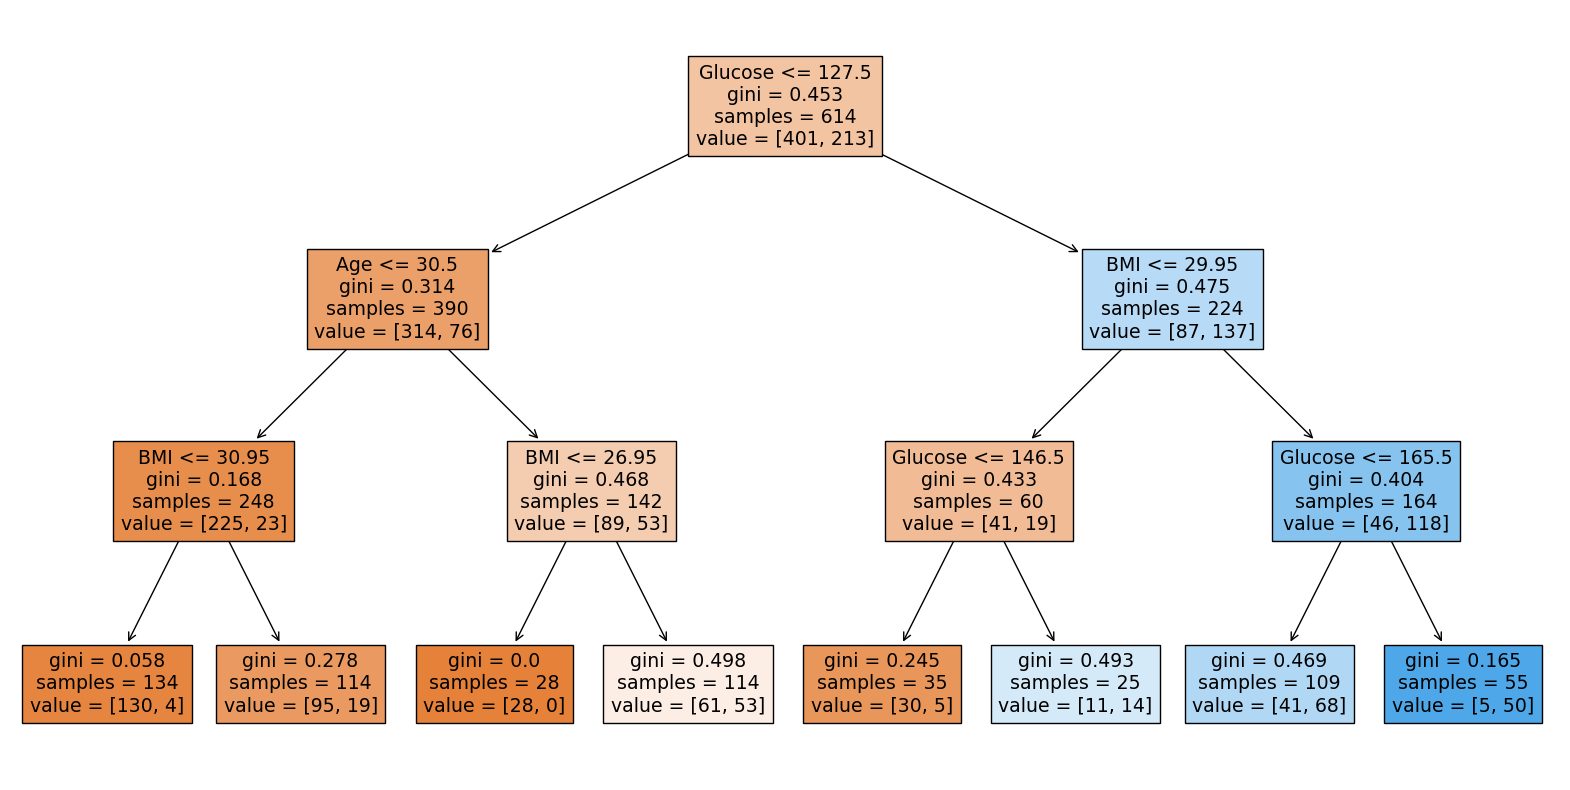

In [94]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()

In [95]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [96]:
y_pred = clf.predict(X_test)


In [97]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78        99
         1.0       0.60      0.58      0.59        55

    accuracy                           0.71       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.71      0.71      0.71       154



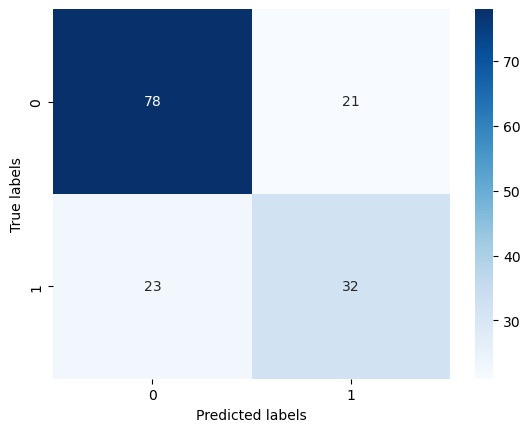

In [98]:
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


In [99]:
# calculate ROC curve and AUC score
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


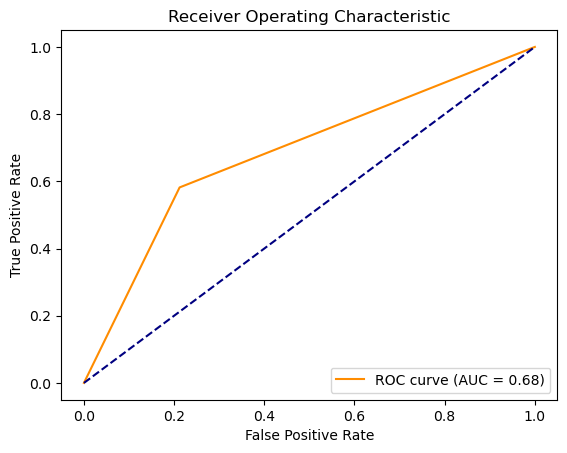

In [100]:
# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### INTERPRETATION

In this case, the decision tree splits on several variables, including glucose level, BMI, and age. The most important variables in this decision tree are glucose level and BMI, which are also commonly known risk factors for diabetes. The decision tree also identifies an age threshold of 28.5 years, which suggests that younger individuals are at a lower risk of developing diabetes.

At the first level of the tree, the glucose level is the most important predictor of diabetes risk, with a threshold of 127.5 mg/dL. Individuals with glucose levels below this threshold are classified as non-diabetic, while those with glucose levels above this threshold are further split based on BMI.

At the second level of the tree, individuals with a BMI below 26.95 kg/m2 and glucose levels between 127.5 and 141.5 mg/dL are classified as non-diabetic. Those with a BMI above this threshold and glucose levels between 127.5 and 141.5 mg/dL are further split based on age, with those under 28.5 years old classified as non-diabetic.

At the third level of the tree, individuals with glucose levels above 141.5 mg/dL and BMI below 26.95 kg/m2 are classified as diabetic. Those with glucose levels above 141.5 mg/dL, BMI above 26.95 kg/m2, and age above 28.5 years are also classified as diabetic.

In summary, this decision tree model suggests that glucose level and BMI are the most important predictors of diabetes risk, with age playing a secondary role. Individuals with glucose levels above 127